# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import r2_score
import numpy as np

In [3]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips = tips[tips['tip_pct']<.5]
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98


In [4]:
y, X = patsy.dmatrices('tip ~  net_bill ', tips)
X

DesignMatrix with shape (242, 2)
  Intercept  net_bill
          1     15.98
          1      8.68
          1     17.51
          1     20.37
          1     20.98
          1     20.58
          1      6.77
          1     23.76
          1     13.08
          1     11.55
          1      8.56
          1     30.26
          1     13.85
          1     15.43
          1     11.81
          1     17.66
          1      8.66
          1     12.58
          1     13.47
          1     17.30
          1     13.84
          1     17.54
          1     13.54
          1     31.84
          1     16.64
          1     15.47
          1     11.37
          1     10.69
          1     17.40
          1     16.65
  [212 rows omitted]
  Terms:
    'Intercept' (column 0)
    'net_bill' (column 1)
  (to view full data, use np.asarray(this_obj))

In [5]:
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           2.41e-25
Time:                        20:19:29   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
tips['residuo'] = modelo.resid

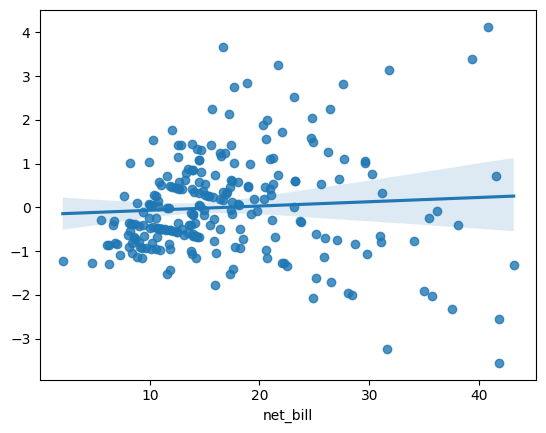

In [18]:
sns.regplot(tips, x='net_bill', y=modelo.resid);

In [24]:
#net_bill com log
y, X = patsy.dmatrices('tip ~ np.log(net_bill) ', tips)
X

DesignMatrix with shape (242, 2)
  Intercept  np.log(net_bill)
          1           2.77134
          1           2.16102
          1           2.86277
          1           3.01406
          1           3.04357
          1           3.02432
          1           1.91250
          1           3.16800
          1           2.57108
          1           2.44669
          1           2.14710
          1           3.40983
          1           2.62829
          1           2.73631
          1           2.46895
          1           2.87130
          1           2.15871
          1           2.53211
          1           2.60046
          1           2.85071
          1           2.62756
          1           2.86448
          1           2.60565
          1           3.46072
          1           2.81181
          1           2.73890
          1           2.43098
          1           2.36931
          1           2.85647
          1           2.81241
  [212 rows omitted]
  Terms:
    'In

In [25]:
modelo_log = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           1.30e-21
Time:                        20:27:34   Log-Likelihood:                -374.91
No. Observations:                 242   AIC:                             753.8
Df Residuals:                     240   BIC:                             760.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2202      0.103     21.494      0.000       2.017       2.424
np.power(net_bill, 2)     0.0022      0.000     10.546      0.000       0.002       0.003
==============================================================================
Omnibus:                       21.866   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.936
Skew:                           0.579   Prob(JB):                     1.16e-07
Kurtosis:                       4.351   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#net_bill com polinomio
y, X = patsy.dmatrices('tip ~ np.power(net_bill, 2) ', tips)
X

DesignMatrix with shape (242, 2)
  Intercept  np.power(net_bill, 2)
          1               255.3604
          1                75.3424
          1               306.6001
          1               414.9369
          1               440.1604
          1               423.5364
          1                45.8329
          1               564.5376
          1               171.0864
          1               133.4025
          1                73.2736
          1               915.6676
          1               191.8225
          1               238.0849
          1               139.4761
          1               311.8756
          1                74.9956
          1               158.2564
          1               181.4409
          1               299.2900
          1               191.5456
          1               307.6516
          1               183.3316
          1              1013.7856
          1               276.8896
          1               239.3209
          1           

In [27]:
modelo_poli = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           1.30e-21
Time:                        20:27:44   Log-Likelihood:                -374.91
No. Observations:                 242   AIC:                             753.8
Df Residuals:                     240   BIC:                             760.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2202      0.103     21.494      0.000       2.017       2.424
np.power(net_bill, 2)     0.0022      0.000     10.546      0.000       0.002       0.003
==============================================================================
Omnibus:                       21.866   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.936
Skew:                           0.579   Prob(JB):                     1.16e-07
Kurtosis:                       4.351   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

.

In [29]:
print('net_bill com log: ',modelo_log.rsquared)
print('net_bill com polinomio: ',modelo_poli.rsquared)

net_bill com log:  0.3674763728526953
net_bill com polinomio:  0.31666430902977505


O melhor modelo foi `net_bill` com log pois ficou com o R² maior

.


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

### 1 - Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

In [34]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (242, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [37]:
modelo2 = sm.OLS(y, X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     34.67
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           8.79e-23
Time:                        20:32:03   Log-Likelihood:                -365.24
No. Observations:                 242   AIC:                             740.5
Df Residuals:                     237   BIC:                             757.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0593      0.238      4.446      0.000       0.590       1.529
sex[T.Female]     -0.0005      0.153     -0.003      0.997      -0.302       0.301
smoker[T.No]       0.2143      0.148      1.450      0.148      -0.077       0.505
time[T.Dinner]     0.0079      0.164      0.048      0.962      -0.315       0.331
net_bill           0.1058      0.009     11.483      0.000       0.088       0.124
==============================================================================
Omnibus:                       31.112   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.889
Skew:                           0.682   Prob(JB):                     2.69e-13
Kurtosis:                       4.969   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

...

### 2 - Remova as variáveis não significantes.

In [38]:
y, X = patsy.dmatrices('tip ~  net_bill', tips)
X

DesignMatrix with shape (242, 2)
  Intercept  net_bill
          1     15.98
          1      8.68
          1     17.51
          1     20.37
          1     20.98
          1     20.58
          1      6.77
          1     23.76
          1     13.08
          1     11.55
          1      8.56
          1     30.26
          1     13.85
          1     15.43
          1     11.81
          1     17.66
          1      8.66
          1     12.58
          1     13.47
          1     17.30
          1     13.84
          1     17.54
          1     13.54
          1     31.84
          1     16.64
          1     15.47
          1     11.37
          1     10.69
          1     17.40
          1     16.65
  [212 rows omitted]
  Terms:
    'Intercept' (column 0)
    'net_bill' (column 1)
  (to view full data, use np.asarray(this_obj))

..

### 3 - Observe o gráfico de resíduos em função de net_bill

<Axes: xlabel='net_bill'>

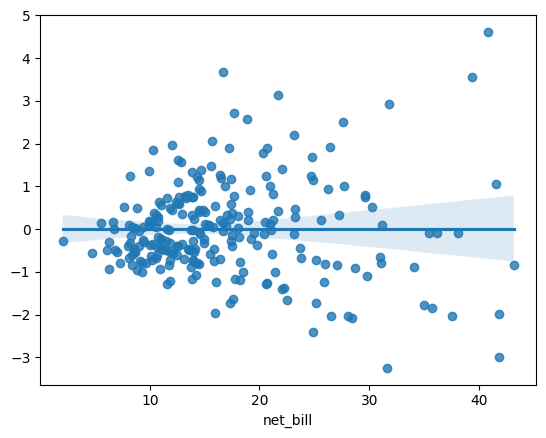

In [40]:
sns.regplot(tips, x='net_bill', y=modelo2.resid)

..

### 4 - Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [42]:
y, X = patsy.dmatrices('tip ~  np.power(net_bill, 2)', tips)
X

DesignMatrix with shape (242, 2)
  Intercept  np.power(net_bill, 2)
          1               255.3604
          1                75.3424
          1               306.6001
          1               414.9369
          1               440.1604
          1               423.5364
          1                45.8329
          1               564.5376
          1               171.0864
          1               133.4025
          1                73.2736
          1               915.6676
          1               191.8225
          1               238.0849
          1               139.4761
          1               311.8756
          1                74.9956
          1               158.2564
          1               181.4409
          1               299.2900
          1               191.5456
          1               307.6516
          1               183.3316
          1              1013.7856
          1               276.8896
          1               239.3209
          1           

In [44]:
modelo_polinomio = sm.OLS(y, X).fit()
modelo_polinomio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           1.30e-21
Time:                        20:39:26   Log-Likelihood:                -374.91
No. Observations:                 242   AIC:                             753.8
Df Residuals:                     240   BIC:                             760.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2202      0.103     21.494      0.000       2.017       2.424
np.power(net_bill, 2)     0.0022      0.000     10.546      0.000       0.002       0.003
==============================================================================
Omnibus:                       21.866   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.936
Skew:                           0.579   Prob(JB):                     1.16e-07
Kurtosis:                       4.351   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
y, X = patsy.dmatrices('tip ~  np.log(net_bill)', tips)
X

DesignMatrix with shape (242, 2)
  Intercept  np.log(net_bill)
          1           2.77134
          1           2.16102
          1           2.86277
          1           3.01406
          1           3.04357
          1           3.02432
          1           1.91250
          1           3.16800
          1           2.57108
          1           2.44669
          1           2.14710
          1           3.40983
          1           2.62829
          1           2.73631
          1           2.46895
          1           2.87130
          1           2.15871
          1           2.53211
          1           2.60046
          1           2.85071
          1           2.62756
          1           2.86448
          1           2.60565
          1           3.46072
          1           2.81181
          1           2.73890
          1           2.43098
          1           2.36931
          1           2.85647
          1           2.81241
  [212 rows omitted]
  Terms:
    'In

In [46]:
modelo_logaritimo = sm.OLS(y, X).fit()
modelo_logaritimo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     139.4
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           1.13e-25
Time:                        20:40:40   Log-Likelihood:                -365.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     240   BIC:                             742.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9851      0.427     -4.651      0.000      -2.826      -1.144
np.log(net_bill)     1.8248      0.155     11.808      0.000       1.520       2.129
==============================================================================
Omnibus:                       46.523   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.909
Skew:                           0.881   Prob(JB):                     3.04e-25
Kurtosis:                       5.844   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
print('net_bill com polinomio: ', modelo_polinomio.rsquared)
print('net_bill com log: ', modelo_logaritimo.rsquared)

net_bill com polinomio:  0.31666430902977505
net_bill com log:  0.3674763728526953


O melhor modelo foi `net_bill` com log pois ficou com o R² maior

..

### 5 - Do modelo final deste item, calcule o  R2  na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [60]:
tips['pred_tip'] = np.exp(modelo.fittedvalues)
print('tip sem log: ',tips[['pred_tip', 'tip']].corr().iloc[0,1]**2)

tips['pred_tip2'] = np.exp(modelo2.fittedvalues)
print('Modelo 2:    ',tips[['pred_tip2', 'tip']].corr().iloc[0,1]**2)

tip sem log:  0.16901656201105675
Modelo 2:     0.25831711408429403


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

###1 - Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [152]:
df_renda = pd.read_csv('previsao_renda.csv')

In [153]:
df_renda.head(2)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14


In [155]:
df_renda.shape

(15000, 16)

In [157]:
df_renda.isnull().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [163]:
df_renda.dropna(inplace=True)

In [164]:
df_renda.shape

(12466, 16)

In [165]:
y, X = patsy.dmatrices('renda ~ tempo_emprego', df_renda)
X

DesignMatrix with shape (12466, 2)
  Intercept  tempo_emprego
          1        3.57534
          1        0.86027
          1        8.06575
          1        1.20822
          1       13.87397
          1       15.56164
          1        5.04658
          1        1.59178
          1        3.43014
          1        7.21918
          1        5.63836
          1        4.47945
          1       16.52877
          1        7.93425
          1        5.54247
          1        5.35890
          1        6.93425
          1        4.00822
          1       10.63562
          1        2.68219
          1       14.95890
          1        1.52055
          1        1.76164
          1        2.43288
          1        3.48767
          1       19.96712
          1        7.17808
          1        0.34795
          1        9.55342
          1       18.38904
  [12436 rows omitted]
  Terms:
    'Intercept' (column 0)
    'tempo_emprego' (column 1)
  (to view full data, use np.asarray(t

In [166]:
modelo_renda = sm.OLS(y, X).fit()
modelo_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:54:31   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2 - Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

<Axes: xlabel='renda'>

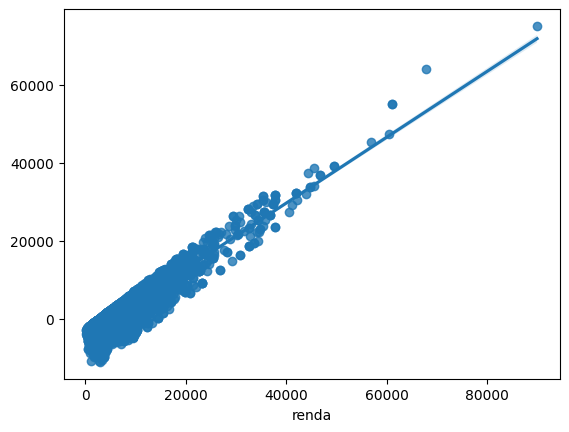

In [176]:
sns.regplot(df_renda[:12466], x='renda', y=modelo_renda.resid)

In [177]:
y, X = patsy.dmatrices('renda ~ np.power(tempo_emprego, 2)', df_renda)
modelo_renda_log = sm.OLS(y, X).fit()
modelo_renda_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:57:28   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3789.9264     45.197     83.854      0.000    3701.334    3878.519
np.power(tempo_emprego, 2)     9.9976      0.201     49.780      0.000       9.604      10.391
==============================================================================
Omnibus:                     9652.373   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333382.424
Skew:                           3.426   Prob(JB):                         0.00
Kurtosis:                      27.391   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3 - Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [179]:
y, X = patsy.dmatrices('''renda ~ sexo
                                +posse_de_veiculo
                                +posse_de_imovel
                                +qtd_filhos
                                +tipo_renda
                                +educacao
                                +estado_civil
                                +tipo_residencia
                                +idade
                                +tempo_emprego
                                +qt_pessoas_residencia
                                ''', df_renda)

In [180]:
regr_multipla = sm.OLS(y, X).fit()
regr_multipla.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:59:04   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -271.2003   1674.811     -0.162      0.871   -3554.089    3011.688
sexo[T.M]                         2366.1922     88.099     26.858      0.000    2193.505    2538.879
posse_de_veiculo[T.True]           -79.1270     84.709     -0.934      0.350    -245.169      86.915
posse_de_imovel[T.True]            349.0015     83.426      4.183      0.000     185.473     512.530
tipo_renda[T.Bolsista]            -817.4651   2155.323     -0.379      0.704   -5042.231    3407.301
tipo_renda[T.Empresário]          1021.9116     90.142     11.337      0.000     845.219    1198.605
tipo_renda[T.Pensionista]         1725.6132   1437.300      1.201      0.230   -1091.716    4542.943
tipo_renda[T.Servidor público]     436.9668    130.511      3.348      0.001     181.145     692.788
educacao[T.Pós graduação]         2207.5583   1081.061      2.042      0.041      88.511    4326.606
educacao[T.Secundário]            -241.1964    437.786     -0.551      0.582   -1099.324     616.931
educacao[T.Superior completo]      338.2616    439.622      0.769      0.442    -523.465    1199.988
educacao[T.Superior incompleto]   -296.2056    470.976     -0.629      0.529   -1219.392     626.981
estado_civil[T.Separado]           141.9156    806.277      0.176      0.860   -1438.512    1722.343
estado_civil[T.Solteiro]           376.1573    791.461      0.475      0.635   -1175.228    1927.542
estado_civil[T.União]              -41.0497    143.754     -0.286      0.775    -322.829     240.730
estado_civil[T.Viúvo]              -41.1125    827.976     -0.050      0.960   -1664.073    1581.848
tipo_residencia[T.Casa]           -356.2809    328.620     -1.084      0.278   -1000.428     287.866
tipo_residencia[T.Com os pais]    -640.8115    368.489     -1.739      0.082   -1363.106      81.483
tipo_residencia[T.Comunitário]    -577.7117    634.059     -0.911      0.362   -1820.565     665.142
tipo_residencia[T.Estúdio]        -976.1765    547.353     -1.783      0.075   -2049.073      96.720
tipo_residencia[T.Governamental]  -883.1863    397.273     -2.223      0.026   -1661.903    -104.470
qtd_filhos                        -240.3254    789.406     -0.304      0.761   -1787.683    1307.032
idade                               29.8746      4.808      6.213      0.000      20.450      39.299
tempo_emprego                      299.3338      6.140     48.750      0.000     287.298     311.369
qt_pessoas_residencia              306.2508    787.902      0.389      0.698   -1238.159    1850.661
==============================================================================
Omnibus:                    10075.335   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432391.441
Skew:             

### Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [181]:
y, X = patsy.dmatrices('renda ~ sexo + posse_de_imovel + idade + tempo_emprego', df_renda)
regr_multipla = sm.OLS(y, X).fit()
regr_multipla.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     813.7
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:59:11   Log-Likelihood:            -1.2210e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12461   BIC:                         2.442e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 455.8353    186.029      2.450      0.014      91.190     820.481
sexo[T.M]                2299.6921     82.355     27.924      0.000    2138.263    2461.121
posse_de_imovel[T.True]   434.8417     81.921      5.308      0.000     274.264     595.420
idade                      24.3007      4.427      5.489      0.000      15.623      32.979
tempo_emprego             296.2532      6.097     48.586      0.000     284.301     308.205
==============================================================================
Omnibus:                    10139.758   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           439131.435
Skew:                           3.612   Prob(JB):                         0.00
Kurtosis:                      31.165   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5 - Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [182]:
df_renda['res_log'] = regr_multipla.resid

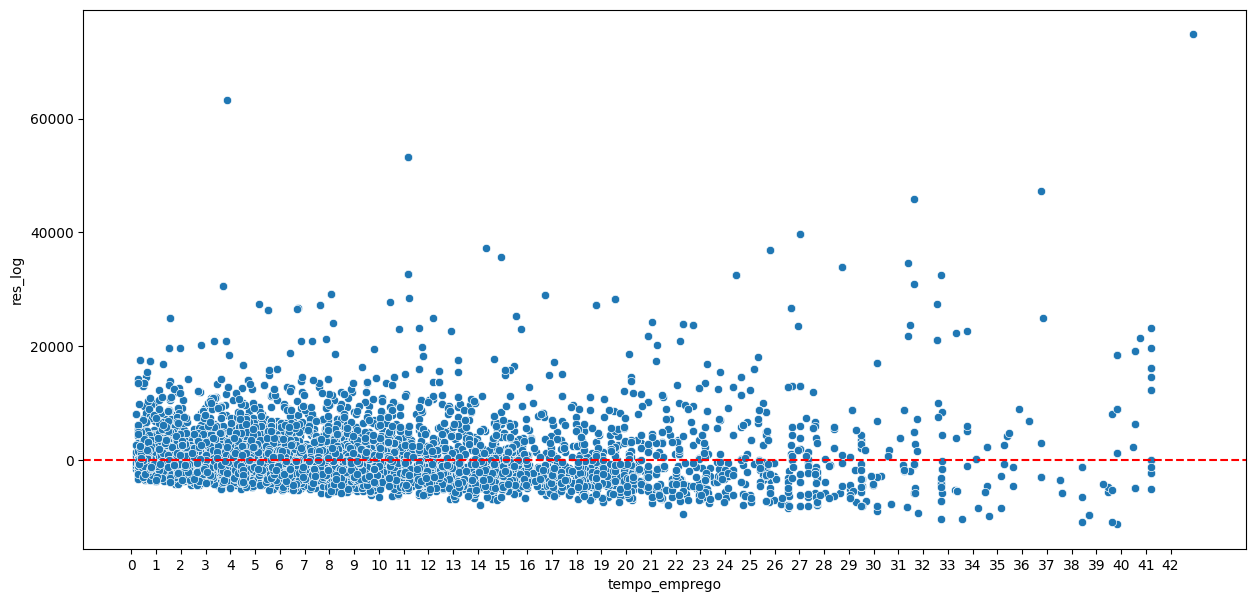

In [213]:

plt.figure(figsize=(15,7))
sns.scatterplot(x='tempo_emprego', y='res_log', data=df_renda)

plt.axhline(y=0, color='r', linestyle='--')

plt.xticks(ticks=np.arange(stop=df_renda['tempo_emprego'].max(), step=1));

### O ajuste deve ser melhorado, apesar dos ajustes no modelo ainda há muito resíduo e alguns outliers que podem estar influenciando no modelo